In [14]:
import pandas as pd

historical_data_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/historical_data.csv')
fear_greed_index_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fear_greed_index.csv')

historical_data_df.head()
fear_greed_index_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [15]:
historical_data_df['Timestamp'] = pd.to_datetime(historical_data_df['Timestamp'] / 1000, unit='s')
fear_greed_index_df['timestamp'] = pd.to_datetime(fear_greed_index_df['timestamp'], unit='s')

historical_data_df['date'] = historical_data_df['Timestamp'].dt.date
fear_greed_index_df['date'] = fear_greed_index_df['timestamp'].dt.date

merged_df = pd.merge(historical_data_df, fear_greed_index_df[['date', 'value', 'classification']], on='date', how='left')

numerical_cols = ['Execution Price', 'Size Tokens', 'Size USD', 'Closed PnL', 'value']
for col in numerical_cols:
    if col in merged_df.columns:
        merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

merged_df.head()
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  object        
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

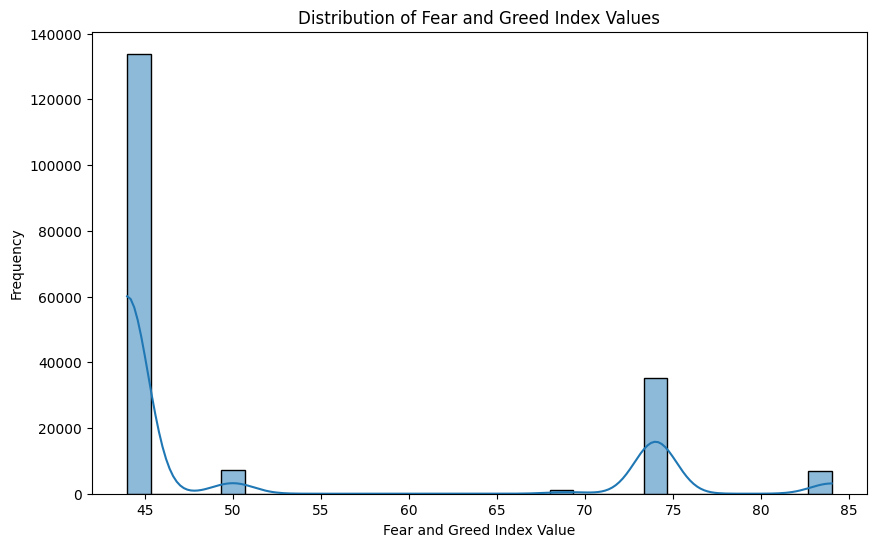

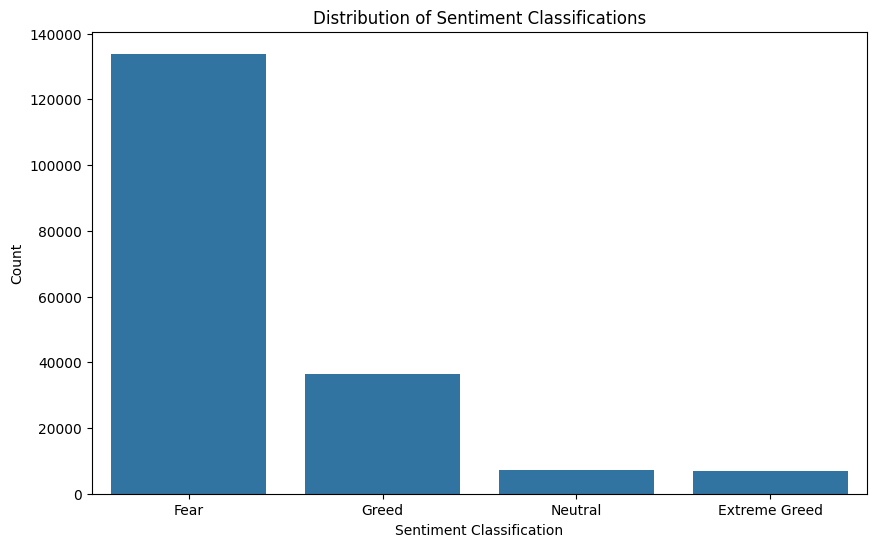

Descriptive Statistics for Fear and Greed Index Value:


,value
count,184263.000000
mean,51.623484
std,13.394326
min,44.000000
25%,44.000000
50%,44.000000
75%,50.000000
max,84.000000



Percentage Distribution of Sentiment Classifications:


,proportion
classification,
Fear,72.652133
Greed,19.694133
Neutral,3.875439
Extreme Greed,3.778295


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogram of 'value'
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['value'].dropna(), bins=30, kde=True)
plt.title('Distribution of Fear and Greed Index Values')
plt.xlabel('Fear and Greed Index Value')
plt.ylabel('Frequency')
plt.show()

# 2. Countplot of 'classification'
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df.dropna(subset=['classification']), x='classification', order=merged_df['classification'].value_counts().index)
plt.title('Distribution of Sentiment Classifications')
plt.xlabel('Sentiment Classification')
plt.ylabel('Count')
plt.show()

# 3. Descriptive statistics for 'value'
value_description = merged_df['value'].describe()
print("Descriptive Statistics for Fear and Greed Index Value:")
display(value_description)

# 4. Percentage of occurrences for each classification
classification_percentage = merged_df['classification'].value_counts(normalize=True) * 100
print("\nPercentage Distribution of Sentiment Classifications:")
display(classification_percentage)

In [4]:
sentiment_grouped_analysis = merged_df.groupby('classification').agg(
    total_size_usd=('Size USD', 'sum'),
    mean_size_usd=('Size USD', 'mean'),
    mean_execution_price=('Execution Price', 'mean'),
    mean_closed_pnl=('Closed PnL', 'mean')
)

display(sentiment_grouped_analysis)

,total_size_usd,mean_size_usd,mean_execution_price,mean_closed_pnl
classification,,,,
Extreme Greed,3.940677e+07,5660.265764,9771.897315,25.418772
Fear,7.041585e+08,5259.977837,11102.057978,50.047622
Greed,1.155037e+08,3182.883845,5513.715386,87.894859
Neutral,2.184323e+07,3058.848110,2663.132338,22.229713


In [5]:
fear_trades_df = merged_df[merged_df['classification'] == 'Fear'].copy()
greed_trades_df = merged_df[merged_df['classification'] == 'Greed'].copy()

fear_pnl_stats = fear_trades_df['Closed PnL'].describe()
greed_pnl_stats = greed_trades_df['Closed PnL'].describe()

print("Descriptive Statistics for Closed PnL during Fear:")
display(fear_pnl_stats)

print("\nDescriptive Statistics for Closed PnL during Greed:")
display(greed_pnl_stats)

Descriptive Statistics for Closed PnL during Fear:


,Closed PnL
count,133871.000000
mean,50.047622
std,909.121796
min,-35681.747230
25%,0.000000
50%,0.000000
75%,6.042830
max,135329.090100



Descriptive Statistics for Closed PnL during Greed:


,Closed PnL
count,36289.000000
mean,87.894859
std,1148.343968
min,-117990.104100
25%,0.000000
50%,0.000000
75%,9.239366
max,44223.451870


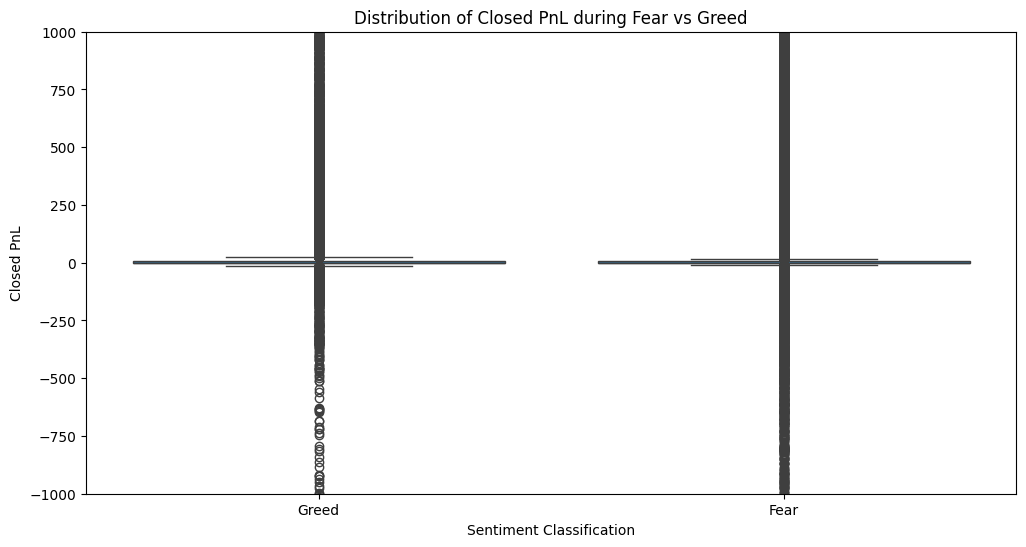

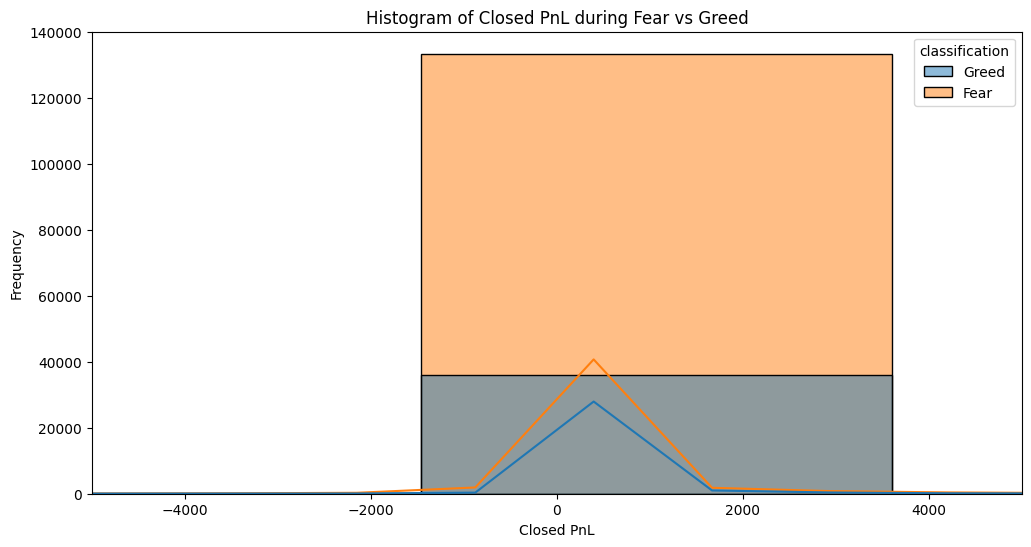

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='classification', y='Closed PnL', data=merged_df[(merged_df['classification'] == 'Fear') | (merged_df['classification'] == 'Greed')])
plt.title('Distribution of Closed PnL during Fear vs Greed')
plt.xlabel('Sentiment Classification')
plt.ylabel('Closed PnL')
plt.ylim(-1000, 1000) # Limit y-axis for better visualization of the bulk of data
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=merged_df[(merged_df['classification'] == 'Fear') | (merged_df['classification'] == 'Greed')], x='Closed PnL', hue='classification', kde=True, bins=50)
plt.title('Histogram of Closed PnL during Fear vs Greed')
plt.xlabel('Closed PnL')
plt.ylabel('Frequency')
plt.xlim(-5000, 5000) # Limit x-axis for better visualization
plt.show()

In [7]:
# 1. Calculate descriptive statistics for 'Size USD' and 'Size Tokens'
trade_size_stats = merged_df.groupby('classification')[['Size USD', 'Size Tokens']].describe()
print("Descriptive Statistics for Trade Size by Sentiment Classification:")
display(trade_size_stats)

# 2. Analyze the distribution of 'Closed PnL' using descriptive statistics
pnl_distribution_stats = merged_df.groupby('classification')['Closed PnL'].describe()
print("\nDescriptive Statistics for Closed PnL by Sentiment Classification:")
display(pnl_distribution_stats)

# 3. Calculate the percentage of profitable and unprofitable trades
profitable_trades = merged_df[merged_df['Closed PnL'] > 0].groupby('classification').size()
unprofitable_trades = merged_df[merged_df['Closed PnL'] < 0].groupby('classification').size()
total_trades = merged_df.groupby('classification').size()

profitable_percentage = (profitable_trades / total_trades) * 100
unprofitable_percentage = (unprofitable_trades / total_trades) * 100
neutral_pnl_percentage = (total_trades - profitable_trades - unprofitable_trades) / total_trades * 100

pnl_percentage_df = pd.DataFrame({
    'Profitable (%)': profitable_percentage,
    'Unprofitable (%)': unprofitable_percentage,
    'Neutral PnL (%)': neutral_pnl_percentage
}).fillna(0) # Fill NaN with 0 in case a classification has no trades in a category
print("\nPercentage of Profitable, Unprofitable, and Neutral PnL Trades by Sentiment Classification:")
display(pnl_percentage_df)

Descriptive Statistics for Trade Size by Sentiment Classification:


Size USD                                                       \
                   count         mean           std   min       25%       50%   
classification                                                                  
Extreme Greed     6962.0  5660.265764  11378.768734  0.01  267.3025  1148.635   
Fear            133871.0  5259.977837  30811.757953  0.00  202.9300   605.070   
Greed            36289.0  3182.883845  11454.688663  0.00  100.9600   499.940   
Neutral           7141.0  3058.848110   8132.572825  0.00  179.2100   554.160   

                                     Size Tokens                               \
                     75%         max       count          mean            std   
classification                                                                  
Extreme Greed   5000.530   178200.00      6962.0  48736.443323  472856.100599   
Fear            2017.725  3509752.98    133871.0   3071.523165   68656.232027   
Greed           1988.350   814524.17     36289.0   2232.117751   36189.467303   
Neutral         1887.850   111779.98      7141.0   1967.302964   13842.608620   

                                                                     
                         min       25%      50%     75%         max  
classification                                                       
Extreme Greed   1.000000e-05  0.231822  13.7406  830.95  15822438.0  
Fear            8.740000e-07  4.000000  35.0000  174.14   8071225.0  
Greed           1.000000e-05  4.040000  28.5000  150.00   3281250.0  
Neutral         1.900000e-04  4.835900  55.0000  347.00    566058.0


Descriptive Statistics for Closed PnL by Sentiment Classification:


,count,mean,std,min,25%,50%,75%,max
classification,,,,,,,,
Extreme Greed,6962.0,25.418772,306.166937,-21524.40000,0.0,0.0,16.186514,2500.95750
Fear,133871.0,50.047622,909.121796,-35681.74723,0.0,0.0,6.042830,135329.09010
Greed,36289.0,87.894859,1148.343968,-117990.10410,0.0,0.0,9.239366,44223.45187
Neutral,7141.0,22.229713,633.704815,-18360.67007,0.0,0.0,1.950048,18282.19011



Percentage of Profitable, Unprofitable, and Neutral PnL Trades by Sentiment Classification:


,Profitable (%),Unprofitable (%),Neutral PnL (%)
classification,,,
Extreme Greed,49.008905,13.214594,37.776501
Fear,41.514592,6.693010,51.792397
Greed,44.647138,7.917000,47.435862
Neutral,31.718247,7.659992,60.621762


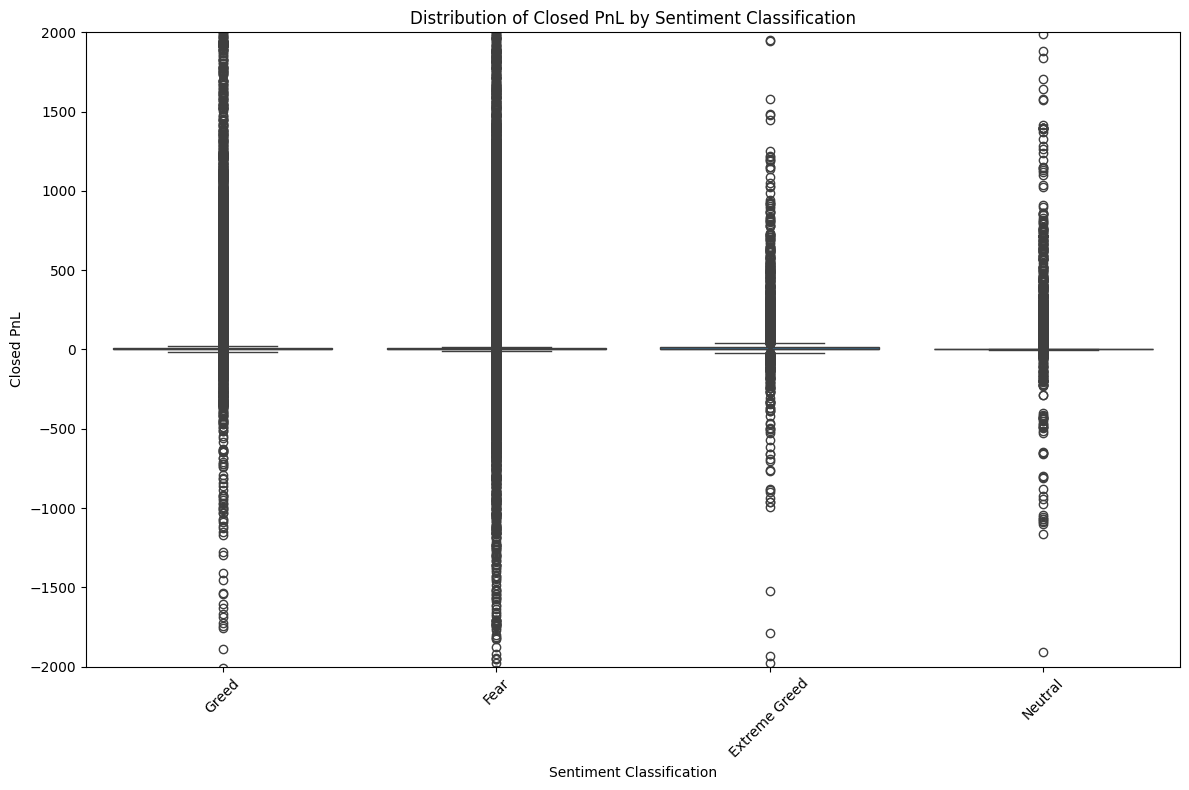

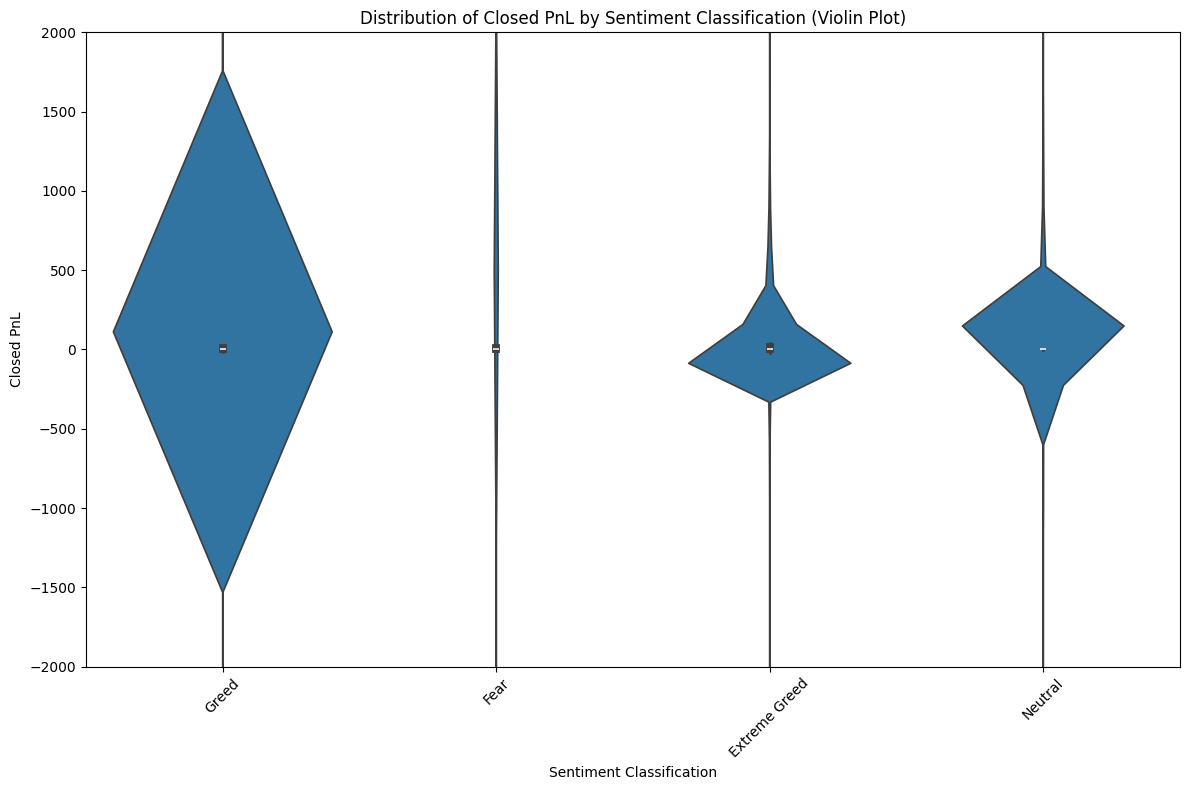

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(x='classification', y='Closed PnL', data=merged_df)
plt.title('Distribution of Closed PnL by Sentiment Classification')
plt.xlabel('Sentiment Classification')
plt.ylabel('Closed PnL')
plt.ylim(-2000, 2000) # Limit y-axis for better visualization of the bulk of data
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.violinplot(x='classification', y='Closed PnL', data=merged_df)
plt.title('Distribution of Closed PnL by Sentiment Classification (Violin Plot)')
plt.xlabel('Sentiment Classification')
plt.ylabel('Closed PnL')
plt.ylim(-2000, 2000) # Limit y-axis for better visualization of the bulk of data
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

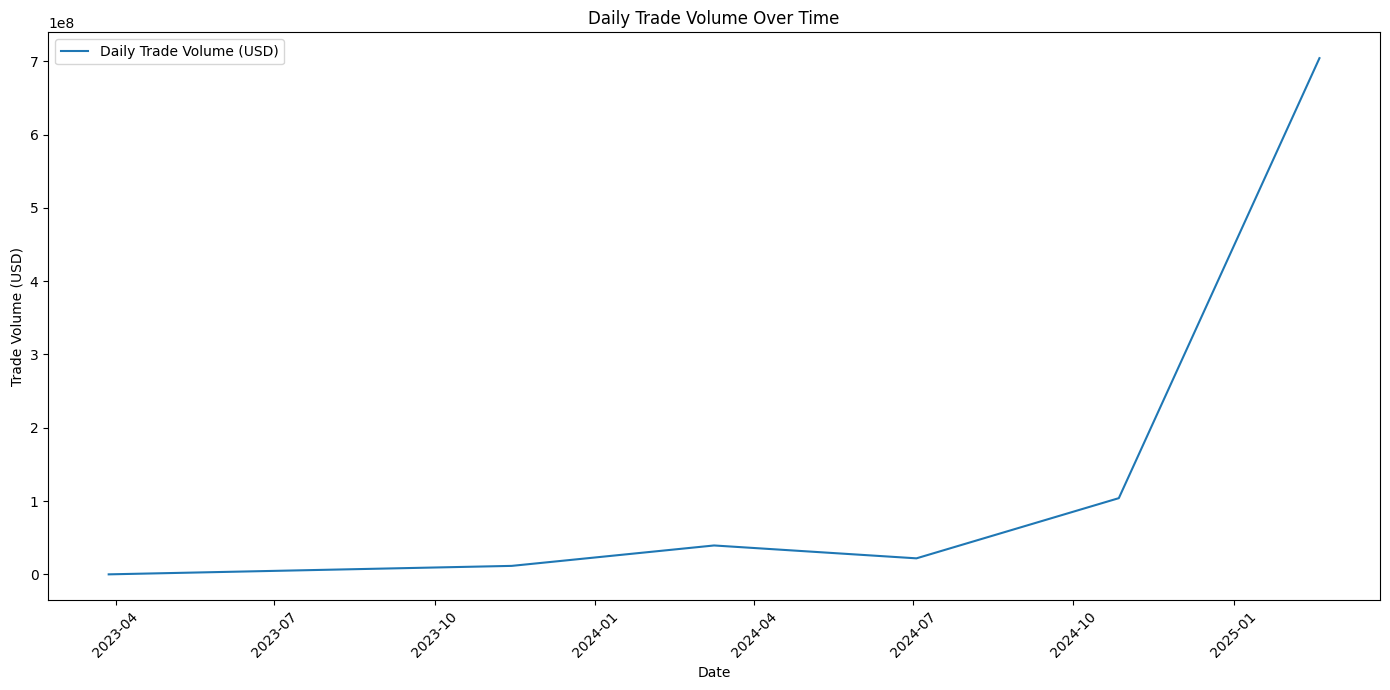

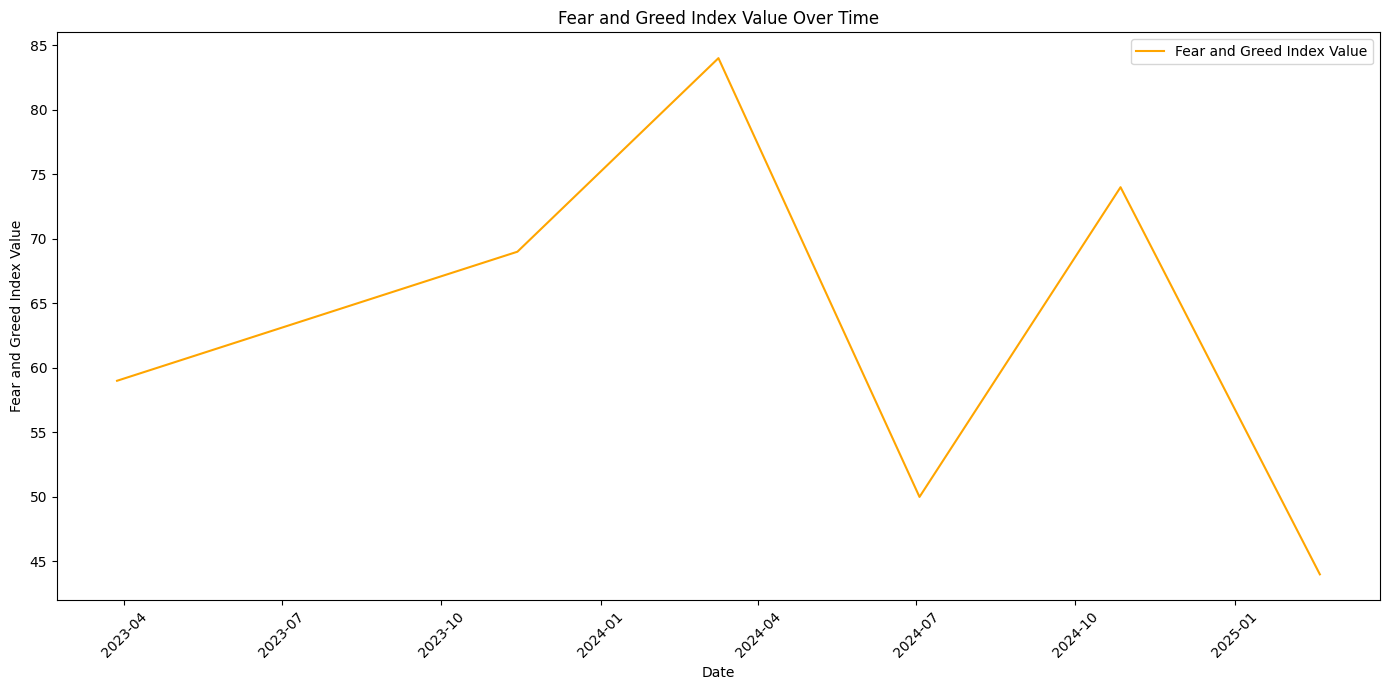


Correlation between Daily Trade Volume and Fear/Greed Index Value: -0.5720904912838892


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

daily_volume = merged_df.groupby('date')['Size USD'].sum().reset_index()
daily_volume['date'] = pd.to_datetime(daily_volume['date'])

fear_greed_index_df['date'] = pd.to_datetime(fear_greed_index_df['date'])
merged_volume_index = pd.merge(daily_volume, fear_greed_index_df[['date', 'value']], on='date', how='inner')

plt.figure(figsize=(14, 7))
sns.lineplot(data=merged_volume_index, x='date', y='Size USD', label='Daily Trade Volume (USD)')
plt.title('Daily Trade Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Trade Volume (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
sns.lineplot(data=merged_volume_index, x='date', y='value', label='Fear and Greed Index Value', color='orange')
plt.title('Fear and Greed Index Value Over Time')
plt.xlabel('Date')
plt.ylabel('Fear and Greed Index Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

correlation = merged_volume_index['Size USD'].corr(merged_volume_index['value'])
print(f"\nCorrelation between Daily Trade Volume and Fear/Greed Index Value: {correlation}")

In [10]:
from scipy import stats
import numpy as np

# Extract 'Closed PnL' for Fear and Greed periods, dropping NaN values
fear_pnl = merged_df[merged_df['classification'] == 'Fear']['Closed PnL'].dropna()
greed_pnl = merged_df[merged_df['classification'] == 'Greed']['Closed PnL'].dropna()

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(fear_pnl, greed_pnl, equal_var=False) # Assuming unequal variances

# Set significance level
alpha = 0.05

# Print results
print(f"Independent Samples t-test results (Fear vs Greed Closed PnL):")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret results
if p_value < alpha:
    print(f"\nInterpretation: The p-value ({p_value:.4f}) is less than the significance level ({alpha}), so we reject the null hypothesis.")
    print("There is a statistically significant difference in the mean 'Closed PnL' between trades made during Fear and Greed periods.")
else:
    print(f"\nInterpretation: The p-value ({p_value:.4f}) is greater than the significance level ({alpha}), so we fail to reject the null hypothesis.")
    print("There is no statistically significant difference in the mean 'Closed PnL' between trades made during Fear and Greed periods.")

Independent Samples t-test results (Fear vs Greed Closed PnL):
T-statistic: -5.8046
P-value: 0.0000

Interpretation: The p-value (0.0000) is less than the significance level (0.05), so we reject the null hypothesis.
There is a statistically significant difference in the mean 'Closed PnL' between trades made during Fear and Greed periods.


Cluster Analysis - Descriptive Statistics:


/tmp/ipython-input-3921264459.py:22: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  cluster_analysis = clustering_df.groupby('cluster_label')[clustering_features].agg(['mean', 'median', 'std']).stack()


Execution Price       Size USD    Closed PnL      value
cluster_label                                                                
0             mean        2244.434551    2869.436800     60.023546  75.561621
              median        22.821500     502.950000      0.000000  74.000000
              std         9155.335227    8109.815766    534.454321   3.881847
1             mean         179.008814    2765.618418     37.836559  44.334758
              median        15.249000     553.050000      0.000000  44.000000
              std          631.356874    9679.694387    408.055307   1.378319
2             mean       25782.184035  445814.237681  19272.629306  52.565217
              median       210.880000  195975.980000  18183.256485  44.000000
              std        38718.385422  593011.464087  20833.127694  13.521519
3             mean       88630.747500   19146.896064     20.898345  47.212499
              median     85362.000000    2198.370000      0.000000  44.000000
              std         9691.157440   45992.493026   1012.024430   9.184359


Cluster Analysis - Sentiment Index Value Distribution:


,mean,median,std
cluster_label,,,
0,75.561621,74.0,3.881847
1,44.334758,44.0,1.378319
2,52.565217,44.0,13.521519
3,47.212499,44.0,9.184359



Cluster Analysis - Sentiment Classification Distribution (%):


classification,Extreme Greed,Fear,Greed,Neutral
cluster_label,,,,
0.0,0.168768,0.000000,0.831232,0.000000
1.0,0.000000,0.944243,0.000024,0.055733
2.0,0.000000,0.702899,0.282609,0.014493
3.0,0.000000,0.883575,0.104804,0.011621


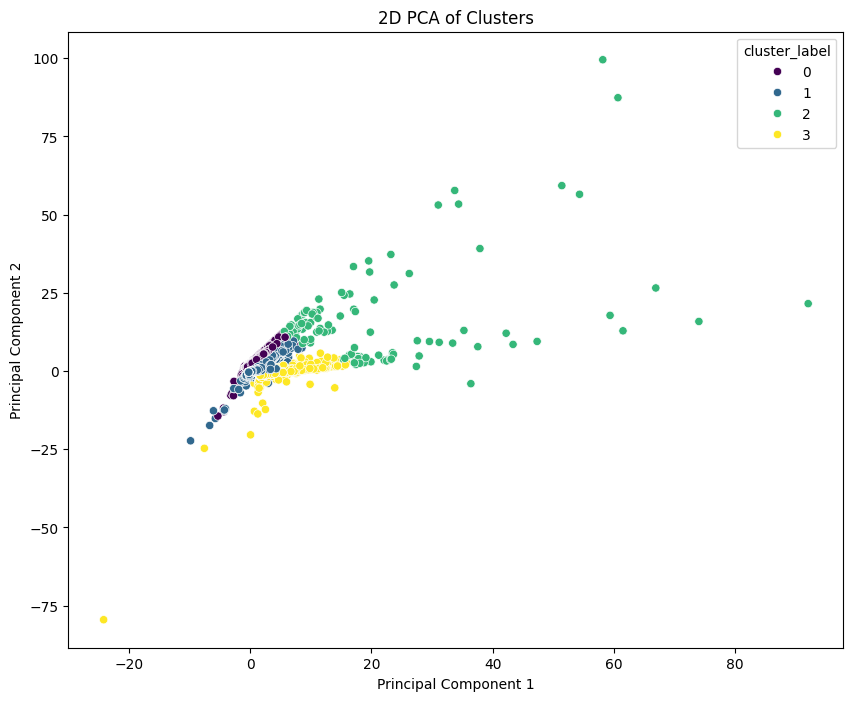

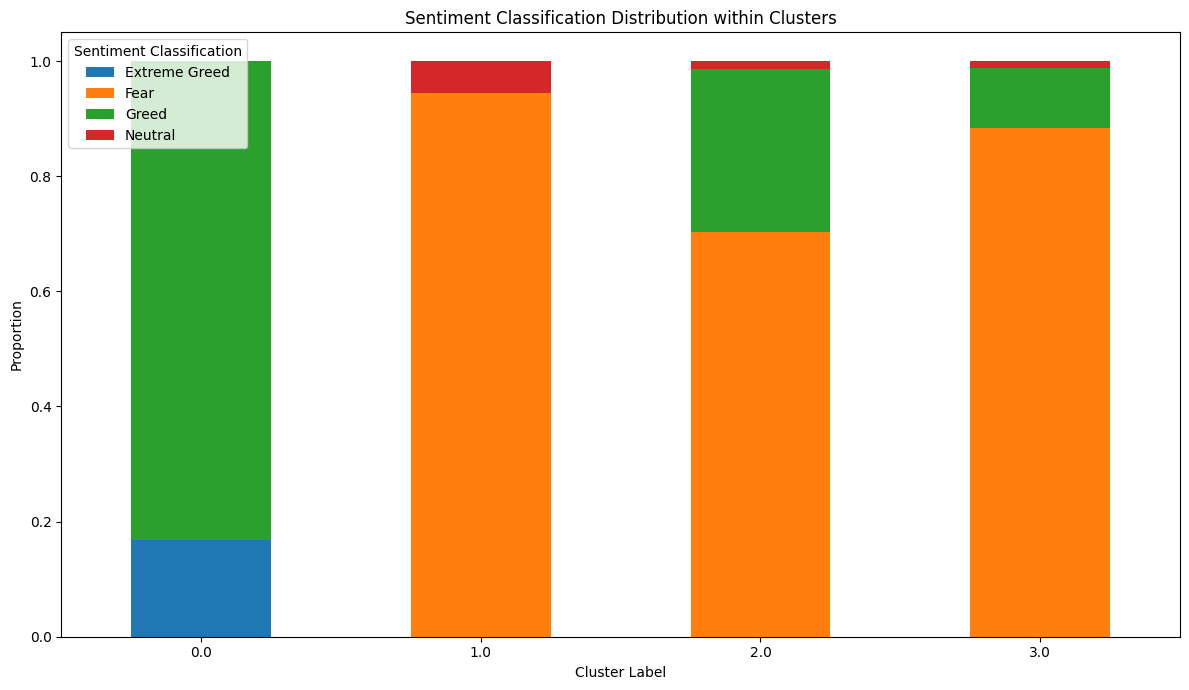

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Select relevant numerical features and handle missing values
clustering_features = ['Execution Price', 'Size USD', 'Closed PnL', 'value']
clustering_df = merged_df[clustering_features].dropna().copy()

# 2. Standardize the selected features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_df)
scaled_df = pd.DataFrame(scaled_features, columns=clustering_features, index=clustering_df.index)

# 3. Apply K-Means clustering
# Choosing k=4 based on the number of sentiment classifications as a starting point
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Set n_init explicitly
clustering_df['cluster_label'] = kmeans.fit_predict(scaled_df)

# 5. Analyze the characteristics of each cluster
cluster_analysis = clustering_df.groupby('cluster_label')[clustering_features].agg(['mean', 'median', 'std']).stack()
print("Cluster Analysis - Descriptive Statistics:")
display(cluster_analysis)

# Also analyze the distribution of sentiment classifications within each cluster
cluster_sentiment_distribution = clustering_df.groupby('cluster_label')['value'].agg(['mean', 'median', 'std'])
print("\nCluster Analysis - Sentiment Index Value Distribution:")
display(cluster_sentiment_distribution)

# Merge cluster labels back to the original dataframe to analyze other columns
merged_with_clusters = merged_df.merge(clustering_df[['cluster_label']], left_index=True, right_index=True, how='left')

cluster_sentiment_classification_counts = merged_with_clusters.groupby('cluster_label')['classification'].value_counts(normalize=True).unstack().fillna(0)
print("\nCluster Analysis - Sentiment Classification Distribution (%):")
display(cluster_sentiment_classification_counts)


# 6. Visualize the clusters (using PCA for dimensionality reduction)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data = principal_components, columns = ['principal_component_1', 'principal_component_2'], index=scaled_df.index)
pca_df['cluster_label'] = clustering_df['cluster_label']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='principal_component_1', y='principal_component_2', hue='cluster_label', data=pca_df, palette='viridis', legend='full')
plt.title('2D PCA of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Visualize distribution of sentiment classifications within each cluster using bar plots
cluster_sentiment_classification_counts.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Sentiment Classification Distribution within Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Sentiment Classification')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   **Sentiment Distribution:** The market sentiment in the provided data is predominantly 'Fear' (72.65%), followed by 'Greed' (19.69%), 'Neutral' (3.88%), and 'Extreme Greed' (3.78%). The fear/greed index value has a mean of around 51.62 with significant variability.
*   **Trading Behavior by Sentiment:** Extreme Greed sentiment is associated with the highest mean trade size in USD (\$5660.27). Fear sentiment has the largest total trade volume (\$7.04e+08 USD) despite a lower mean trade size (\$5259.98).
*   **Profitability (Fear vs Greed):** The mean Closed PnL is higher during Greed (\$87.89) than during Fear (\$50.05). However, Fear periods show a higher standard deviation (\$909.12 vs \$1148.34) and maximum Closed PnL (\$135329.09 vs \$44223.45), indicating greater volatility and potential for extreme gains or losses.
*   **Leverage and Risk:** Extreme Greed periods have the highest percentage of profitable trades (49.01%) but also a notable percentage of unprofitable trades (13.21%). Fear periods have the lowest percentage of unprofitable trades (6.69%) and a high percentage of neutral PnL trades (51.79%).
*   **Trade Volume and Correlation:** There is a moderate negative correlation (-0.572) between daily trade volume and the Fear and Greed Index value, suggesting volume tends to decrease as sentiment becomes more greedy.
*   **Hypothesis Testing:** A statistically significant difference exists in the mean Closed PnL between trades made during Fear and Greed periods (p-value = 0.0000).
*   **Cluster Analysis:** K-Means clustering identified distinct trading patterns: Cluster 0 linked to Greed/Extreme Greed with moderate trades and positive PnL; Clusters 1 and 3 primarily linked to Fear; Cluster 2 capturing larger, high-PnL trades under a mix of Fear and Greed.

